In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


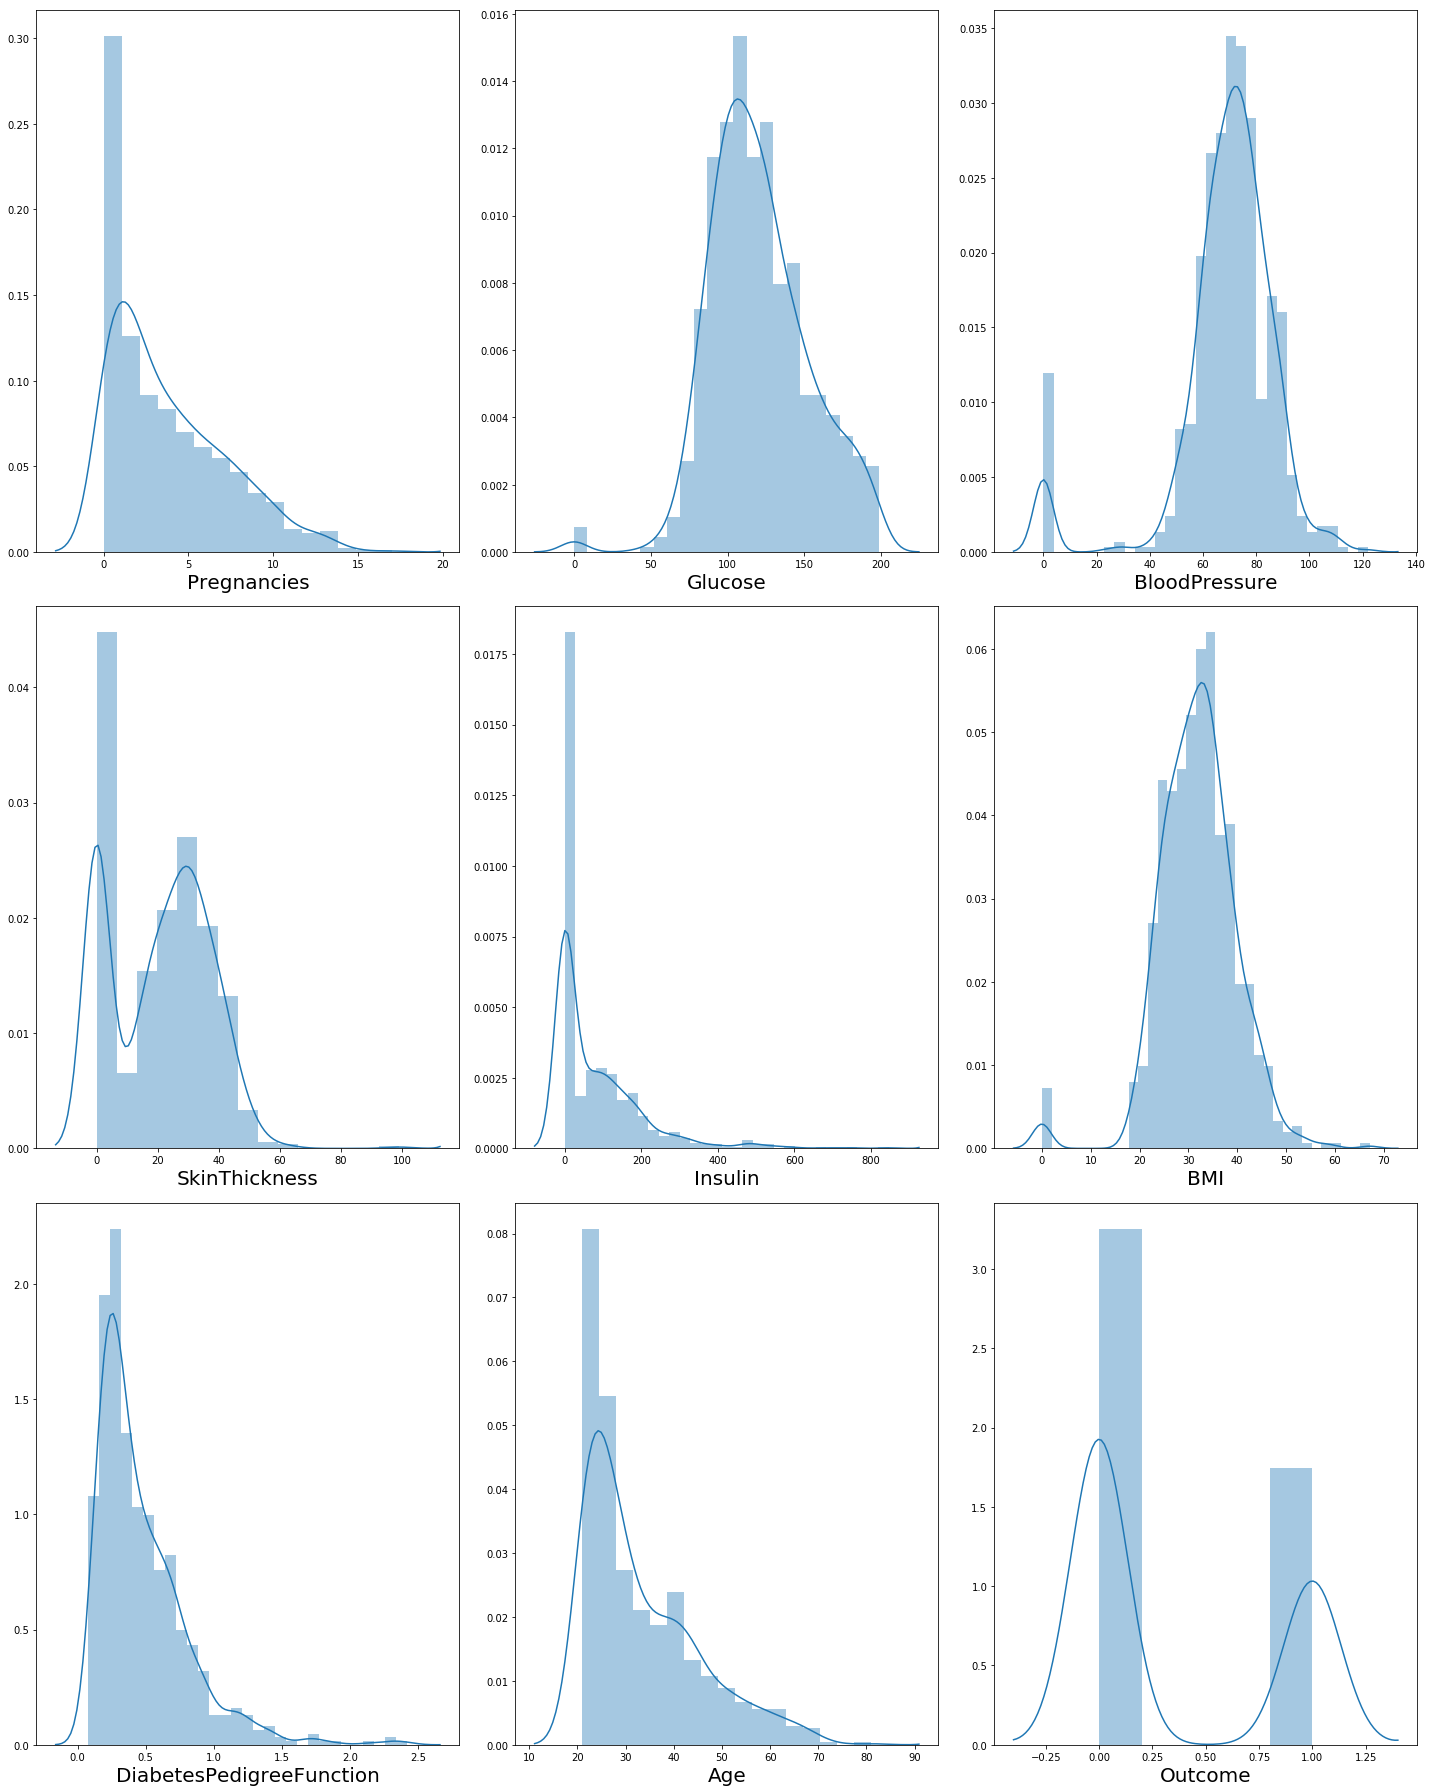

In [5]:
plt.figure(figsize=(20,25),facecolor='w')
plotno=1
for col in data:
    if plotno<=9:
        ax=plt.subplot(3,3,plotno)
        sns.distplot(data[col])
        plt.xlabel(col,fontsize=20)
    plotno+=1
plt.tight_layout()

In [6]:
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data["BloodPressure"].mean())

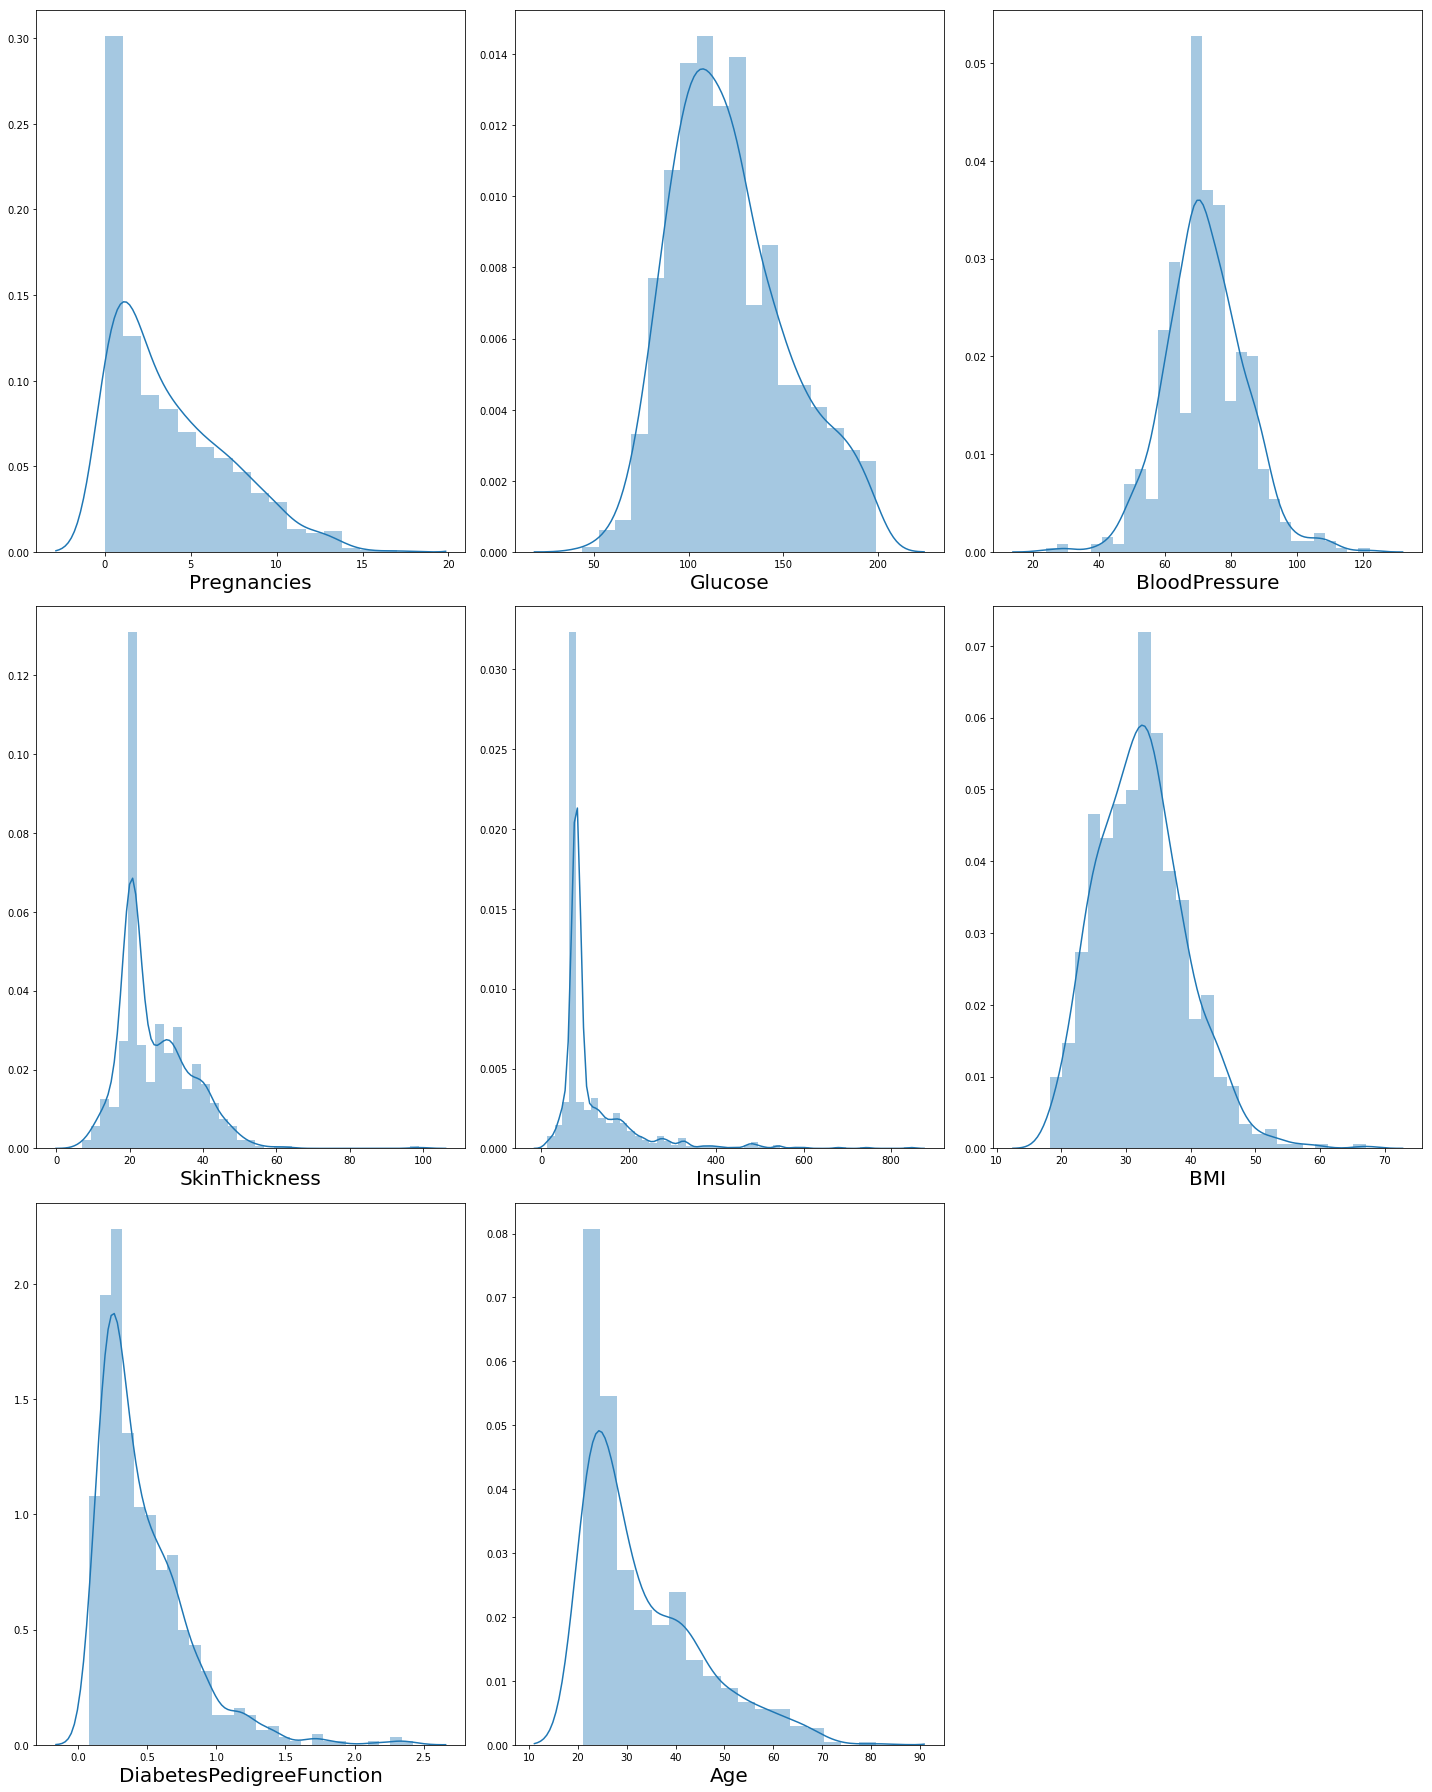

In [7]:
plt.figure(figsize=(20,25),facecolor='w')
plot=1
for col in data:
    if plot<9:
        ax=plt.subplot(3,3,plot)
        sns.distplot(data[col])
        plt.xlabel(col,fontsize=20)
    plot+=1
plt.tight_layout()

In [8]:
data_feature=data.drop('Outcome',axis=1)

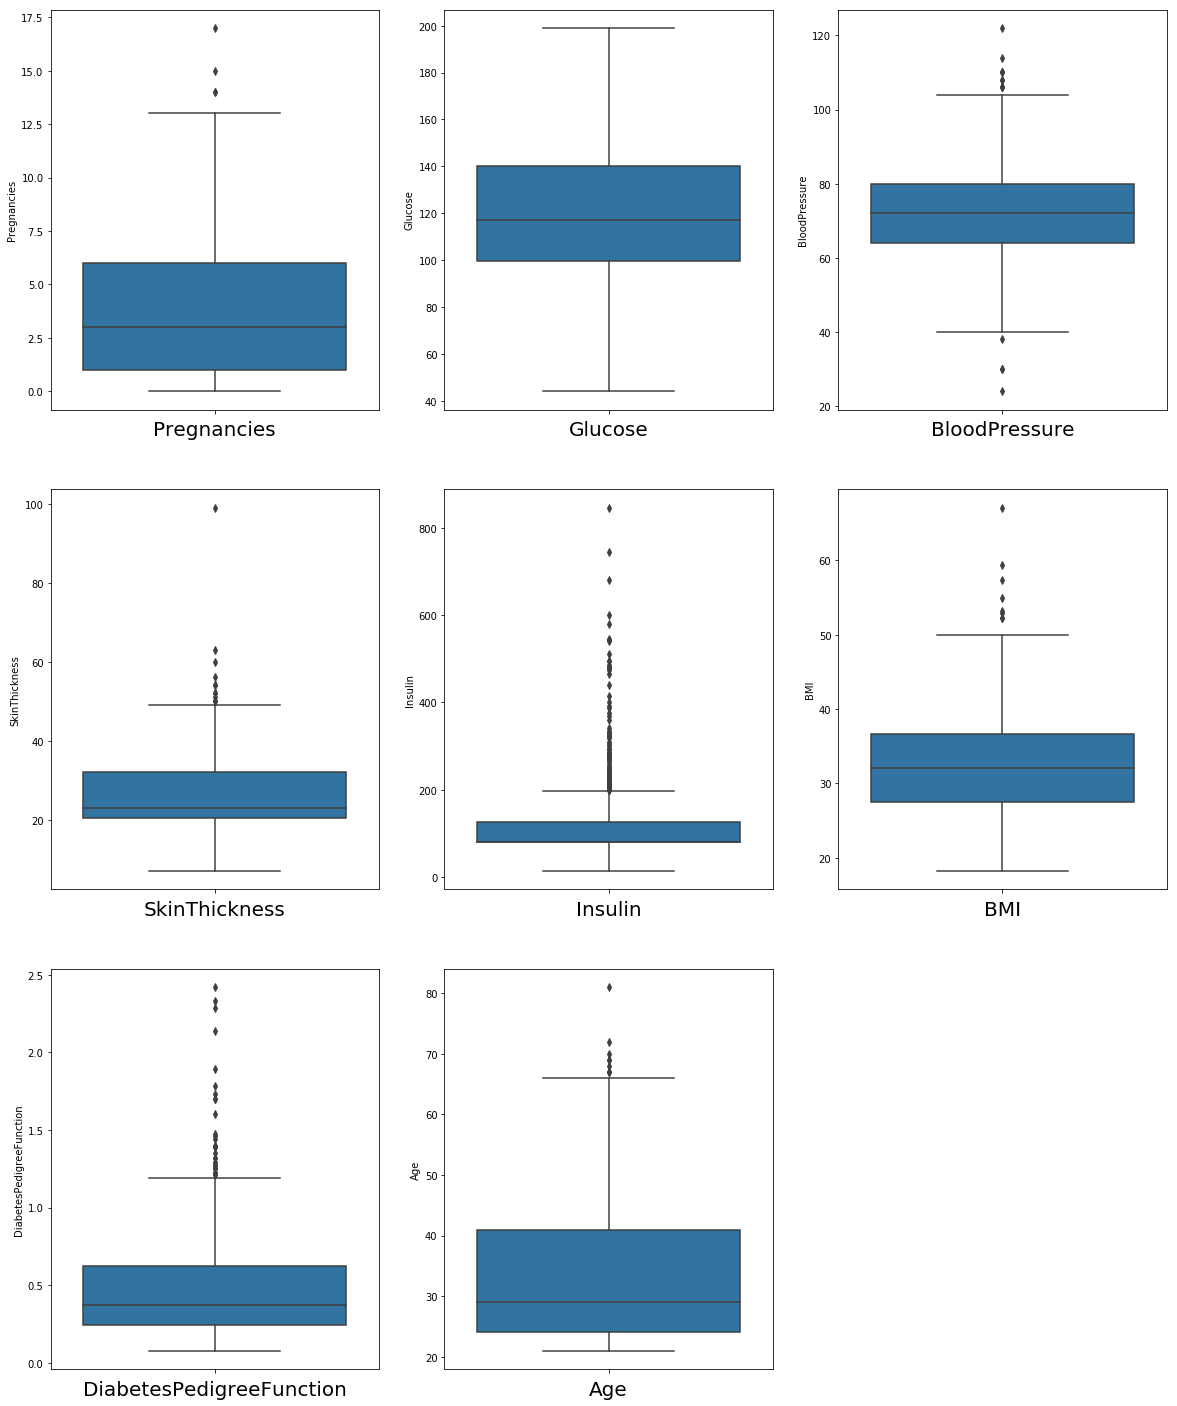

In [9]:
plt.figure(figsize=(20,25),facecolor='W')
graph=1
for col in data_feature:
    if graph<9:
        ax=plt.subplot(3,3,graph)
        sns.boxplot(data_feature[col],orient='v')
        plt.xlabel(col,fontsize=20)
    graph+=1
plt.show()

In [10]:
q3=data.quantile(.75)
q1=data.quantile(0.25)
iqr=q3-q1

In [11]:
high_preg=q3.Pregnancies+1.5*iqr.Pregnancies
high_preg

13.5

In [12]:
index=np.where(data['Pregnancies']>high_preg)
index

(array([ 88, 159, 298, 455], dtype=int64),)

In [13]:
data=data.drop(data.index[index])

In [14]:
data.shape

(764, 9)

In [15]:
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.000000,35.000000,79.799479,33.600000,0.627,50,1
1,1,1,85.0,66.000000,29.000000,79.799479,26.600000,0.351,31,0
2,2,8,183.0,64.000000,20.536458,79.799479,23.300000,0.672,32,1
3,3,1,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21,0
4,4,0,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33,1
5,5,5,116.0,74.000000,20.536458,79.799479,25.600000,0.201,30,0
6,6,3,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26,1
7,7,10,115.0,69.105469,20.536458,79.799479,35.300000,0.134,29,0
8,8,2,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53,1
9,9,8,125.0,96.000000,20.536458,79.799479,31.992578,0.232,54,1


In [16]:
high_bp=q3.BloodPressure+1.5*iqr.BloodPressure
print("Outliers for BP:",high_bp)
index=np.where(data.BloodPressure>high_bp)
data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

Outliers for BP: 104.0
(754, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.000000,35.000000,79.799479,33.600000,0.627,50,1
1,1,1,85.0,66.000000,29.000000,79.799479,26.600000,0.351,31,0
2,2,8,183.0,64.000000,20.536458,79.799479,23.300000,0.672,32,1
3,3,1,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21,0
4,4,0,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33,1
5,5,5,116.0,74.000000,20.536458,79.799479,25.600000,0.201,30,0
6,6,3,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26,1
7,7,10,115.0,69.105469,20.536458,79.799479,35.300000,0.134,29,0
8,8,2,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53,1
9,9,8,125.0,96.000000,20.536458,79.799479,31.992578,0.232,54,1


In [17]:
index

(array([ 43,  84, 105, 175, 359, 545, 654, 658, 668, 687], dtype=int64),)

In [18]:
st_high=q3.SkinThickness+1.5*iqr.SkinThickness
print("Oulier for SkinThickness:",st_high)
index=np.where(data.SkinThickness>st_high)
print("Indexes are:",index)
data=data.drop(data.index[index])
print("Shape:",data.shape)

data.reset_index()

Oulier for SkinThickness: 49.1953125
Indexes are: (array([ 56,  84,  96, 116, 146, 205, 267, 269, 437, 523, 569, 581],
      dtype=int64),)
Shape: (742, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.000000,35.000000,79.799479,33.600000,0.627,50,1
1,1,1,85.0,66.000000,29.000000,79.799479,26.600000,0.351,31,0
2,2,8,183.0,64.000000,20.536458,79.799479,23.300000,0.672,32,1
3,3,1,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21,0
4,4,0,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33,1
5,5,5,116.0,74.000000,20.536458,79.799479,25.600000,0.201,30,0
6,6,3,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26,1
7,7,10,115.0,69.105469,20.536458,79.799479,35.300000,0.134,29,0
8,8,2,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53,1
9,9,8,125.0,96.000000,20.536458,79.799479,31.992578,0.232,54,1


In [19]:
ins_high=q3.Insulin+1.5*iqr.Insulin
print("Outliers for Insulin:",ins_high)
index=np.where(data.Insulin>ins_high)
print("Indexes are:",index,"Length",len(index[0]))
data.drop(data.index[index],inplace=True)
print("Shape:",data.shape)

data.reset_index()

Outliers for Insulin: 198.42578125
Indexes are: (array([  8,  13,  16,  20,  31,  39,  52,  53,  55,  71,  90, 104, 124,
       131, 136, 144, 152, 175, 184, 188, 195, 203, 208, 216, 219, 235,
       236, 242, 246, 265, 272, 273, 282, 283, 294, 305, 320, 344, 345,
       348, 354, 359, 372, 376, 379, 393, 396, 399, 408, 409, 435, 440,
       462, 467, 468, 469, 493, 501, 519, 521, 526, 527, 535, 541, 554,
       563, 572, 584, 586, 590, 623, 633, 635, 648, 654, 660, 669, 674,
       681, 684, 687, 689, 695, 722, 727], dtype=int64),) Length 85
Shape: (657, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.000000,35.000000,79.799479,33.600000,0.627,50,1
1,1,1,85.0,66.000000,29.000000,79.799479,26.600000,0.351,31,0
2,2,8,183.0,64.000000,20.536458,79.799479,23.300000,0.672,32,1
3,3,1,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21,0
4,4,0,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33,1
5,5,5,116.0,74.000000,20.536458,79.799479,25.600000,0.201,30,0
6,6,3,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26,1
7,7,10,115.0,69.105469,20.536458,79.799479,35.300000,0.134,29,0
8,9,8,125.0,96.000000,20.536458,79.799479,31.992578,0.232,54,1
9,10,4,110.0,92.000000,20.536458,79.799479,37.600000,0.191,30,0


In [20]:
BMI_high=q3.BMI+1.5*iqr.BMI
print("Outlier:",BMI_high)
index=np.where(data.BMI>BMI_high)
print("Indexes are:",list(index)," Length:",len(index[0]))
data.drop(data.index[index],inplace=True)
print("Shape:",data.shape)

data.reset_index()

Outlier: 50.25
Indexes are: [array([105, 164, 254], dtype=int64)]  Length: 3
Shape: (654, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.000000,35.000000,79.799479,33.600000,0.627,50,1
1,1,1,85.0,66.000000,29.000000,79.799479,26.600000,0.351,31,0
2,2,8,183.0,64.000000,20.536458,79.799479,23.300000,0.672,32,1
3,3,1,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21,0
4,4,0,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33,1
5,5,5,116.0,74.000000,20.536458,79.799479,25.600000,0.201,30,0
6,6,3,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26,1
7,7,10,115.0,69.105469,20.536458,79.799479,35.300000,0.134,29,0
8,9,8,125.0,96.000000,20.536458,79.799479,31.992578,0.232,54,1
9,10,4,110.0,92.000000,20.536458,79.799479,37.600000,0.191,30,0


In [21]:
dpf_high=q3.DiabetesPedigreeFunction+1.5*iqr.DiabetesPedigreeFunction
print("Outlier:",dpf_high)
index=np.where(data.DiabetesPedigreeFunction>dpf_high)
print("Indexes are:",index,"length:",len(index[0]))
data.drop(data.index[index],inplace=True)
print("Shape:",data.shape)

data.reset_index()

Outlier: 1.2
Indexes are: (array([  4,  11,  38,  47,  83, 123, 157, 182, 204, 206, 216, 244, 256,
       276, 311, 322, 454, 502, 523, 526, 527, 560, 562], dtype=int64),) length: 23
Shape: (631, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.000000,35.000000,79.799479,33.600000,0.627,50,1
1,1,1,85.0,66.000000,29.000000,79.799479,26.600000,0.351,31,0
2,2,8,183.0,64.000000,20.536458,79.799479,23.300000,0.672,32,1
3,3,1,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21,0
4,5,5,116.0,74.000000,20.536458,79.799479,25.600000,0.201,30,0
5,6,3,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26,1
6,7,10,115.0,69.105469,20.536458,79.799479,35.300000,0.134,29,0
7,9,8,125.0,96.000000,20.536458,79.799479,31.992578,0.232,54,1
8,10,4,110.0,92.000000,20.536458,79.799479,37.600000,0.191,30,0
9,11,10,168.0,74.000000,20.536458,79.799479,38.000000,0.537,34,1


In [22]:
age_high=q3.Age+1.5*iqr.Age
print("outlier:",age_high)
index=np.where(data.Age>age_high)
print("Indexes are:",index,"Length:",len(index[0]))
data.drop(data.index[index],inplace=True)

data.reset_index()

outlier: 66.5
Indexes are: (array([ 98, 291, 366, 370, 396, 440, 543, 549, 558], dtype=int64),) Length: 9


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.000000,35.000000,79.799479,33.600000,0.627,50,1
1,1,1,85.0,66.000000,29.000000,79.799479,26.600000,0.351,31,0
2,2,8,183.0,64.000000,20.536458,79.799479,23.300000,0.672,32,1
3,3,1,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21,0
4,5,5,116.0,74.000000,20.536458,79.799479,25.600000,0.201,30,0
5,6,3,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26,1
6,7,10,115.0,69.105469,20.536458,79.799479,35.300000,0.134,29,0
7,9,8,125.0,96.000000,20.536458,79.799479,31.992578,0.232,54,1
8,10,4,110.0,92.000000,20.536458,79.799479,37.600000,0.191,30,0
9,11,10,168.0,74.000000,20.536458,79.799479,38.000000,0.537,34,1


In [23]:
bp_low=q1.BloodPressure-1.5*iqr.BloodPressure
print("oulier for lower:",bp_low)
data.drop(data.index[np.where(data.BloodPressure<bp_low)],inplace=True)

data.reset_index()

oulier for lower: 40.0


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.000000,35.000000,79.799479,33.600000,0.627,50,1
1,1,1,85.0,66.000000,29.000000,79.799479,26.600000,0.351,31,0
2,2,8,183.0,64.000000,20.536458,79.799479,23.300000,0.672,32,1
3,3,1,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21,0
4,5,5,116.0,74.000000,20.536458,79.799479,25.600000,0.201,30,0
5,6,3,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26,1
6,7,10,115.0,69.105469,20.536458,79.799479,35.300000,0.134,29,0
7,9,8,125.0,96.000000,20.536458,79.799479,31.992578,0.232,54,1
8,10,4,110.0,92.000000,20.536458,79.799479,37.600000,0.191,30,0
9,11,10,168.0,74.000000,20.536458,79.799479,38.000000,0.537,34,1


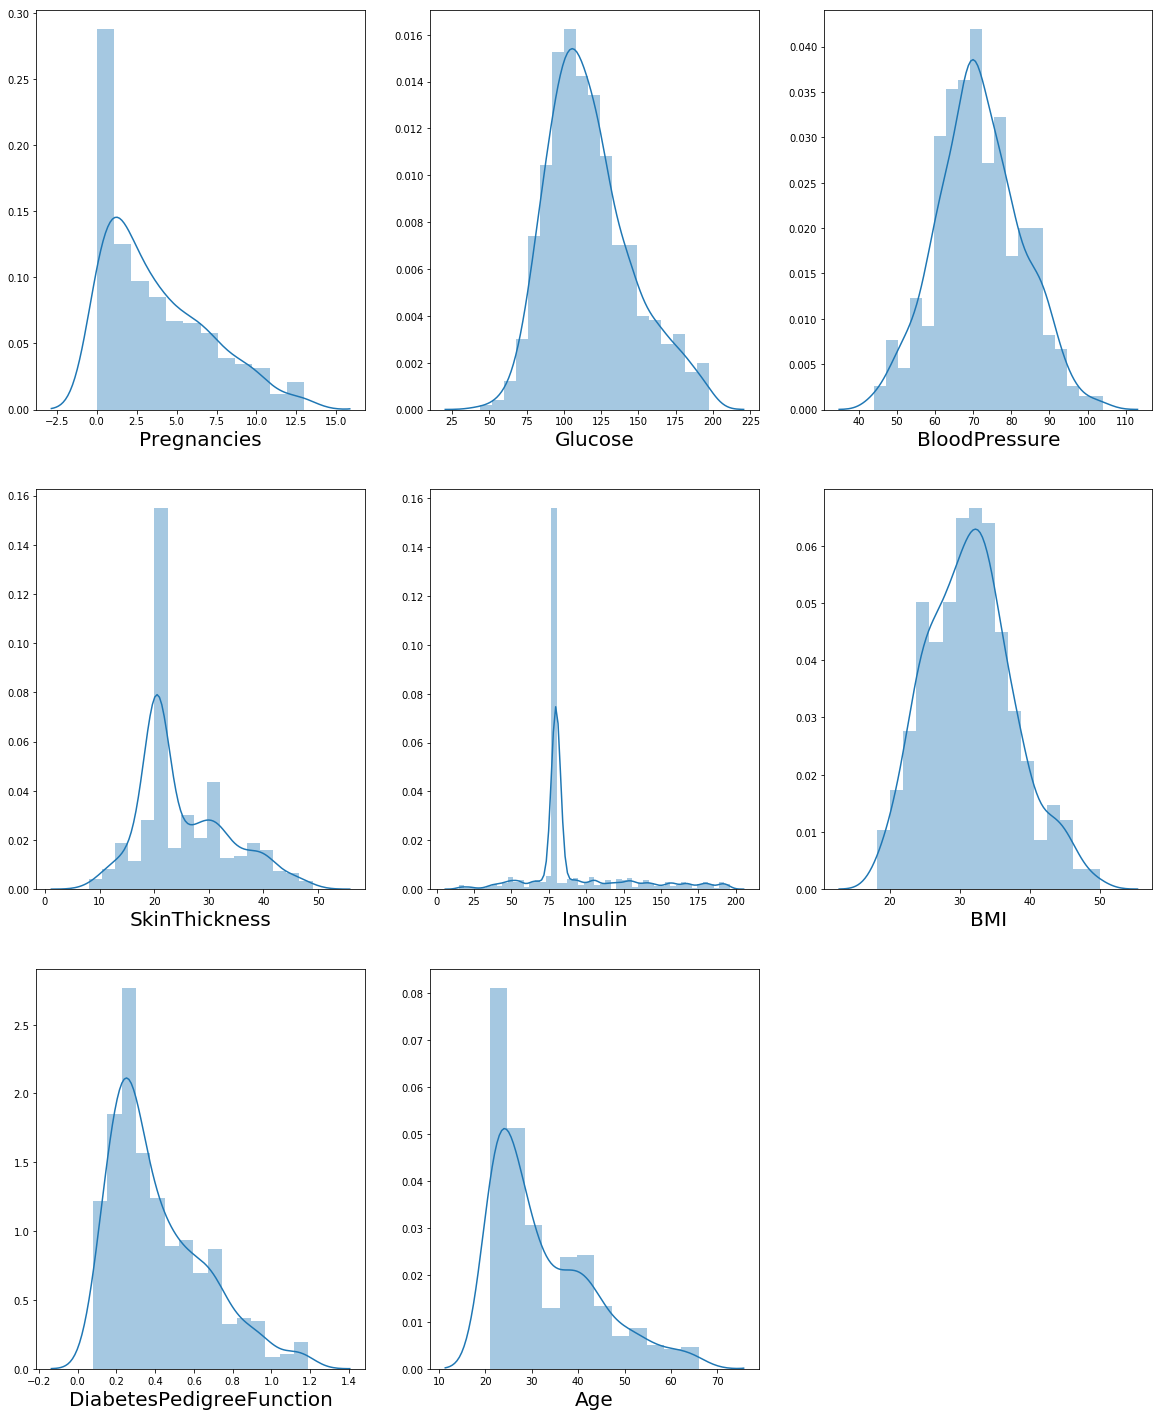

In [24]:
plt.figure(figsize=(20,25),facecolor='w')
graph=1
for col in data:
    if graph<=8:
        ax=plt.subplot(3,3,graph)
        sns.distplot(data[col])
        plt.xlabel(col,fontsize=20)
    graph+=1
plt.show()

In [25]:
x=data.drop(columns='Outcome')
y=data['Outcome']

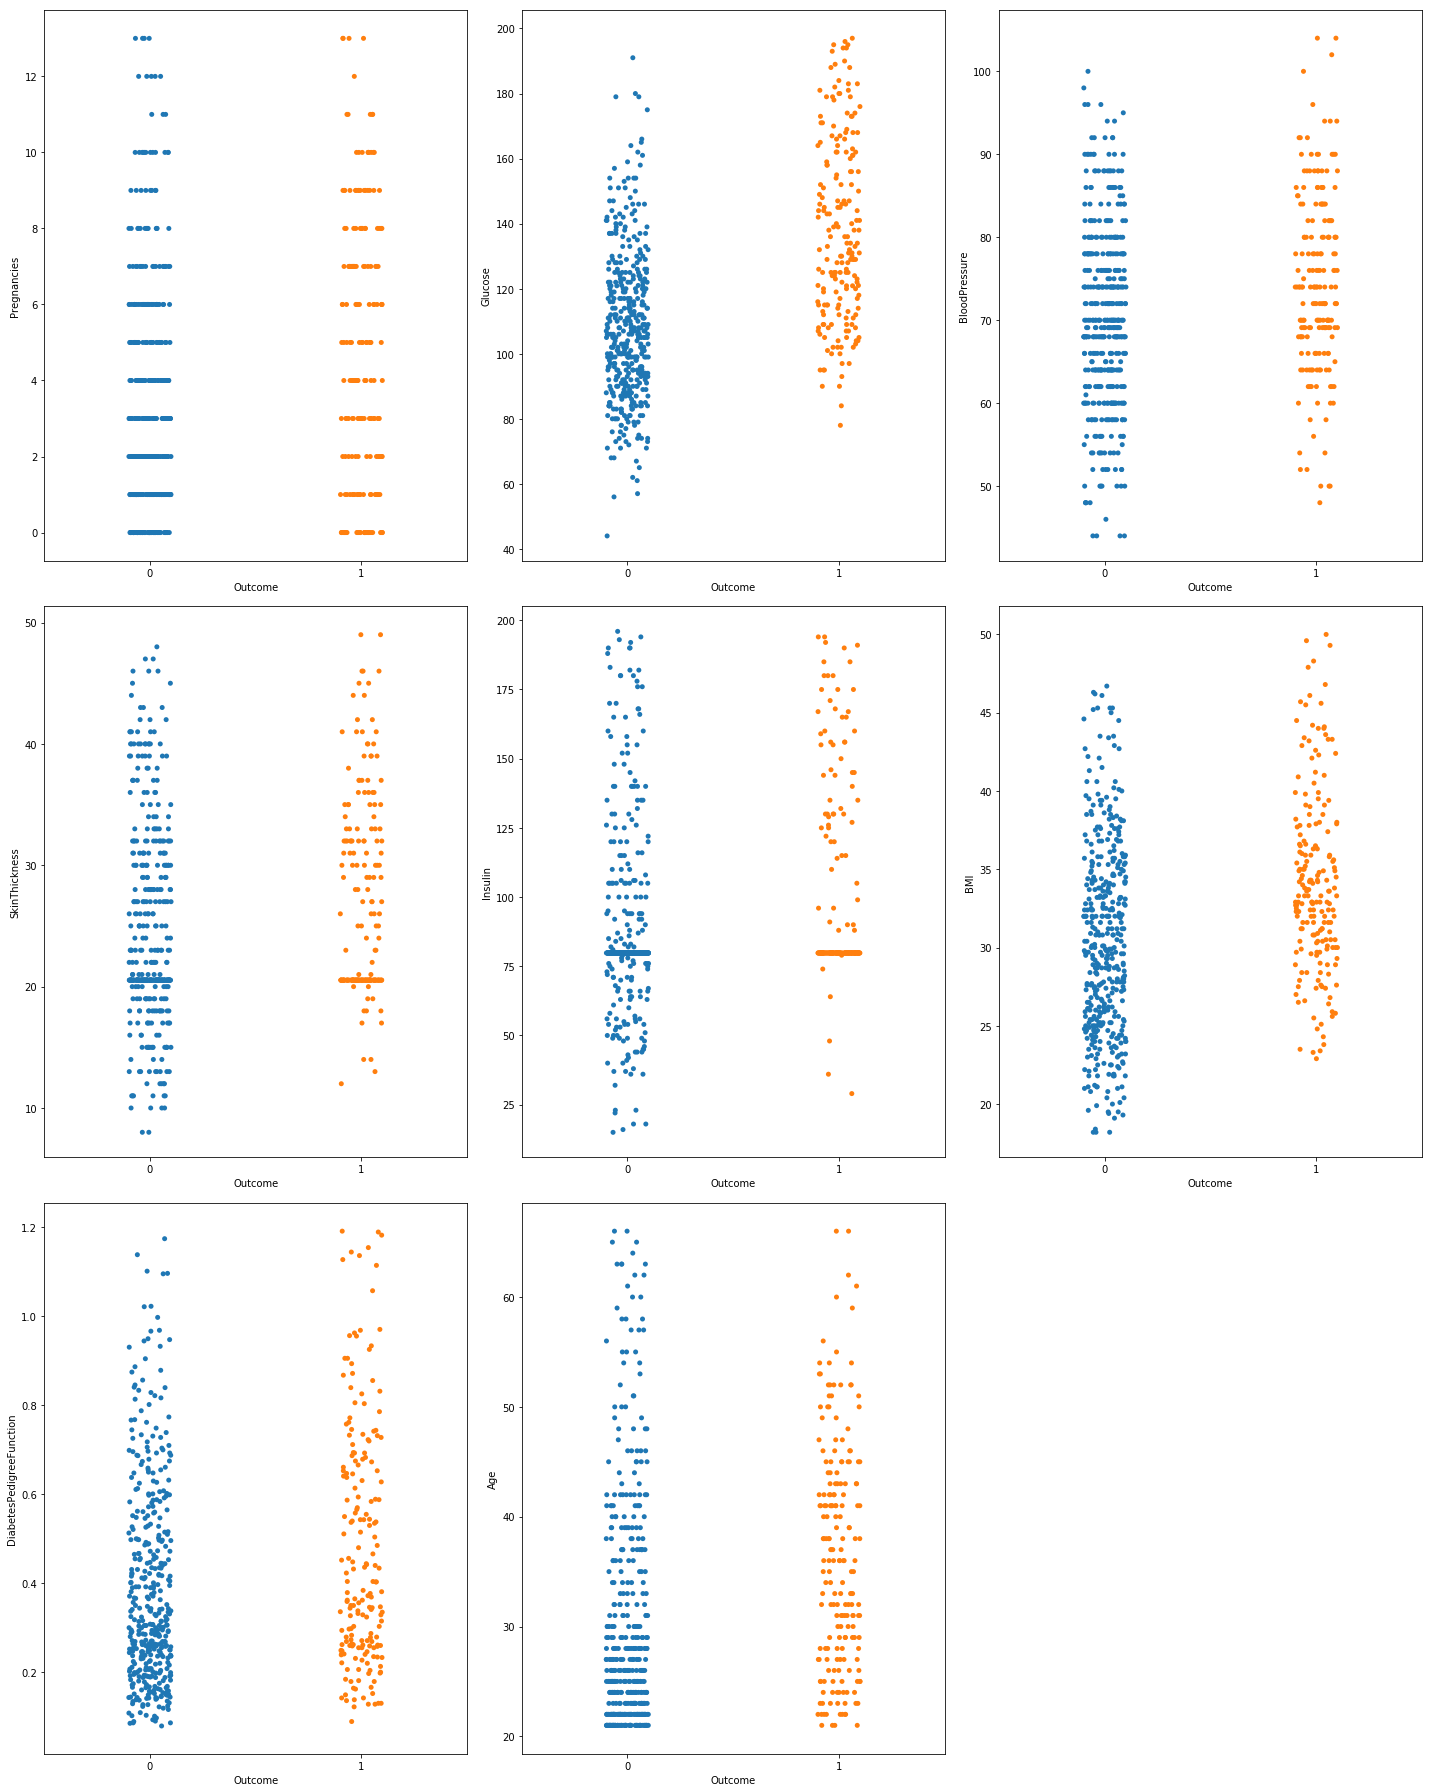

In [26]:
plt.figure(figsize=(20,25),facecolor='W')
grp=1
for col in x:
    if grp<=9:
        ax=plt.subplot(3,3,grp)
        sns.stripplot(y,x[col])
    grp+=1
plt.tight_layout()

In [27]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x)

C:\Users\p.c\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\p.c\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [28]:
X_scaled.shape[1]

8

In [29]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['Features']=x.columns

In [30]:
vif

,vif,Features
0,1.448654,Pregnancies
1,1.250247,Glucose
2,1.258898,BloodPressure
3,1.411508,SkinThickness
4,1.200759,Insulin
5,1.447599,BMI
6,1.038530,DiabetesPedigreeFunction
7,1.659799,Age


In [31]:
x_tran,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=355)

In [32]:
logReg=LogisticRegression()
logReg.fit(x_tran,y_train)

C:\Users\p.c\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
import pickle
#Writing different model files to file
with open("modelForLogistic.sav",'wb') as f:
    pickle.dump(logReg,f)
with open("standardScalar.sav",'wb') as f:
    pickle.dump(scaler,f)

In [34]:
y_pred=logReg.predict(x_test)

In [35]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7612903225806451

In [36]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[94, 11],
       [26, 24]], dtype=int64)

In [37]:
tp=conf_mat[0][0]
fp=conf_mat[0][1]
fn=conf_mat[1][0]
tn=conf_mat[1][1]

In [38]:
acc=(tp+tn)/(tp+fp+fn+tn)
acc

0.7612903225806451

In [39]:
recall=tp/(tp+fp)
recall

0.8952380952380953

In [40]:
precision=tp/(tp+fn)
precision

0.7833333333333333

In [41]:
f1_score=2*recall*precision/(recall+precision)
f1_score

0.8355555555555555

In [42]:
auc=roc_auc_score(y_test,y_pred)
auc

0.6876190476190477

In [46]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

In [47]:
fpr

array([0.       , 0.1047619, 1.       ])

In [48]:
tpr

array([0.  , 0.48, 1.  ])

In [49]:
thresholds

array([2, 1, 0], dtype=int64)

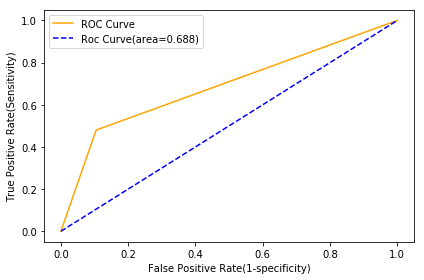

In [53]:
plt.plot(fpr,tpr,color='Orange',label="ROC Curve")
plt.plot([0,1],[0,1],color='Blue',linestyle='--',label='Roc Curve(area=%0.3f)'%auc)
plt.xlabel("False Positive Rate(1-specificity)")
plt.ylabel("True Positive Rate(Sensitivity)")
plt.legend()
plt.tight_layout()